## Mexico Covid-19

## Import modules and packages

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Retrieve training data from https://github.com/CSSEGISandData/COVID-19

The following cells download csvs from CSSEGISandData/COVID-19 repo.

Time-series records in Hubei will be used as training data

In [6]:
DB_c = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
DB_d = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
DB_r = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")

In [7]:
DB_c

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,US,US,37.0902,-95.7129,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
471,Montserrat,United Kingdom,16.7425,-62.1874,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
472,NaN,Guam,13.4443,144.7937,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
473,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [33]:
Hubeic= DB_c[DB_c["Province/State"] == "Hubei"].values[0, 4:]
Chinac = DB_c[DB_c["Country/Region"] == "China"].values[0, 4:]

Mexc = DB_c[DB_c["Country/Region"] == "Mexico"].values[0, 4:]
Mexd = DB_d[DB_d["Country/Region"] == "Mexico"].values[0, 4:]
Mexr = DB_r[DB_r["Country/Region"] == "Mexico"].values[0, 4:]
Spainc = DB_c[DB_c["Country/Region"] == "Spain"].values[0, 4:]
Spaind = DB_d[DB_d["Country/Region"] == "Spain"].values[0, 4:]
Spainr = DB_r[DB_r["Country/Region"] == "Spain"].values[0, 4:]

In [34]:
Mex = np.concatenate(
    [
     Mexc[None, ...],
     Mexr[None, ...],
     Mexd[None, ...]
    ],
    axis=0
).astype(np.float32)

### Visusalize training data (Mexico)

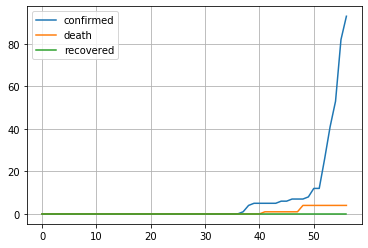

In [35]:
plt.plot(Mex.T)
plt.grid()
plt.legend(["confirmed", "death", "recovered"])
plt.show()

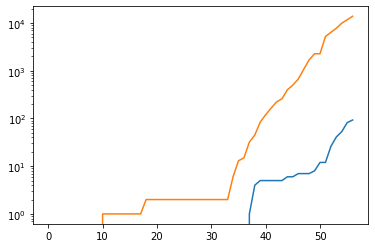

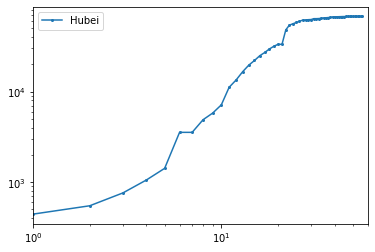

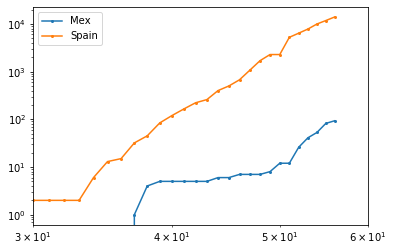

In [36]:
plt.plot(Mexc.T)
plt.plot(Spainc.T)
plt.yscale("log")
plt.show()

plt.plot(Chinac.T, marker='o', markersize=2, label='Hubei')
plt.yscale("log")
plt.xscale("log")
plt.xlim(1,60)
plt.legend()
plt.show()


plt.plot(Mexc.T, marker='o', markersize=2, label='Mex')
plt.plot(Spainc.T, marker='o', markersize=2, label='Spain')
plt.yscale("log")
plt.xscale("log")
plt.xlim(30,60)
plt.legend()
plt.show()
